In [2]:
require("httr")
require("rvest")

In [3]:
library(httr)
library(rvest)

In [4]:
get.data <- function() {
    url <- "https://en.wikipedia.org/w/index.php"
    params <- list(
        title = "Template:COVID-19_testing_by_country"
    )
    response <- GET(url = url, query = params)
    return(response)
}

In [5]:
# Call the get_wiki_covid19_page function and print the response
get.data()

Response [https://en.wikipedia.org/w/index.php?title=Template%3ACOVID-19_testing_by_country]
  Date: 2021-12-03 21:14
  Status: 200
  Content-Type: text/html; charset=UTF-8
  Size: 409 kB
<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Template:COVID-19 testing by country - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames...
"CS1 German-language sources (de)","CS1 Azerbaijani-language sources (az)","C...
"CS1 uses Japanese-language script (ja)","CS1 Japanese-language sources (ja)"...
"COVID-19 pandemic templates"],"wgPageContentLanguage":"en","wgPageContentMod...
"Q87325019","wgGENewcomerTasksGuidanceEnabled":true,"wgGEAskQuestionEnabled":...
...

In [6]:
url <- "https://en.wikipedia.org/w/index.php?title=Template:COVID-19_testing_by_country"

Get the root html node from the http response in task 1 

In [7]:
html.node <- read_html(url)
print(html.node)

{html_document}
<html class="client-nojs" lang="en" dir="ltr">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body class="mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-10 ns-subject ...


In [8]:
root.node <- read_html(url)
print(root.node)

{html_document}
<html class="client-nojs" lang="en" dir="ltr">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body class="mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-10 ns-subject ...


In [9]:
table.node <- html_node(root.node, "table")
print(table.node)

{html_node}
<table class="wikitable plainrowheaders sortable collapsible autocollapse">
[1] <caption>\n<style data-mw-deduplicate="TemplateStyles:r1054937957">.mw-pa ...
[2] <tbody>\n<tr>\n<th>Country or region\n</th>\n<th>Date<sup id="cite_ref-1" ...


In [10]:
df <- html_table(table.node)
print(head(df, 20))

# A tibble: 20 x 9
   `Country or region` `Date[a]`   Tested      `Units[b]` `Confirmed(cases)`
   <chr>               <chr>       <chr>       <chr>      <chr>             
 1 Afghanistan         17 Dec 2020 154,767     samples    49,621            
 2 Albania             18 Feb 2021 428,654     samples    96,838            
 3 Algeria             2 Nov 2020  230,553     samples    58,574            
 4 Andorra             29 Nov 2021 232,591     samples    17,115            
 5 Angola              12 Mar 2021 399,228     samples    20,981            
 6 Antigua and Barbuda 6 Mar 2021  15,268      samples    832               
 7 Argentina           28 Nov 2021 26,111,525  samples    5,325,560         
 8 Armenia             1 Dec 2021  2,373,959   samples    339,020           
 9 Australia           1 Dec 2021  48,083,139  samples    211,654           
10 Austria             1 Dec 2021  110,579,782 samples    1,169,208         
11 Azerbaijan          1 Dec 2021  5,551,849   samples   

In [11]:
summary(df)

 Country or region    Date[a]             Tested            Units[b]        
 Length:173         Length:173         Length:173         Length:173        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 Confirmed(cases)   Confirmed<U+2009>/tested,%        Tested<U+2009>/population,%       
 Length:173         Length:173                 Length:173                 
 Class :character   Class :character           Class :character           
 Mode  :character   Mode  :character           Mode  :character           
 Confirmed<U+2009>/population,%            Ref.          
 Length:173                     Length:173        
 Class :character               Class :character  
 Mode  :character               Mode  :character  

In [12]:
preprocess.df <- function(df) {
    # remove the world row
    df <- df[!(df$`Country or region` == "World"), ]
    # remove the last row
    df <- df[1:172, ]
    # remove the Units and Ref columns
    df["Ref."] <- NULL
    df["Units[b]"] <- NULL

    # rename the columns
    names(df) <- c("Country", "Date", "Tested", "Confirmed", "Confirmed.Test.Ratio", "Tested.Population.Ratio", "Confirmed.Population.Ratio")

    # convert column data types
    df$Country <- as.factor(df$Country)
    df$Date <- as.factor(df$Date)
    df$Tested <- as.numeric(gsub(",","", df$Tested))
    df$Confirmed <- as.numeric(gsub(",","", df$Confirmed))
    df$Confirmed.Test.Ratio <- as.numeric(gsub(",","", df$Confirmed.Test.Ratio))
    df$Tested.Population.Ratio <- as.numeric(gsub(",","", df$Tested.Population.Ratio))
    df$Confirmed.Population.Ratio <- as.numeric(gsub(",","", df$Confirmed.Population.Ratio))

    return(df)
}

In [13]:
df <- preprocess.df(df)
print(head(df, 20))

# A tibble: 20 x 7
   Country             Date   Tested Confirmed Confirmed.Test.~ Tested.Populati~
   <fct>               <fct>   <dbl>     <dbl>            <dbl>            <dbl>
 1 Afghanistan         17 De~ 1.55e5     49621            32.1              0.4 
 2 Albania             18 Fe~ 4.29e5     96838            22.6             15   
 3 Algeria             2 Nov~ 2.31e5     58574            25.4              0.53
 4 Andorra             29 No~ 2.33e5     17115             7.4            300   
 5 Angola              12 Ma~ 3.99e5     20981             5.3              1.3 
 6 Antigua and Barbuda 6 Mar~ 1.53e4       832             5.4             15.9 
 7 Argentina           28 No~ 2.61e7   5325560            20.4             57.5 
 8 Armenia             1 Dec~ 2.37e6    339020            14.3             80.4 
 9 Australia           1 Dec~ 4.81e7    211654             0.44           192   
10 Austria             1 Dec~ 1.11e8   1169208             1.1           1242   
11 Azerba

In [14]:
??gsub

R Information

Help files with alias or concept or title matching 'gsub' using regular
expression matching:


R.utils::egsub          Global substitute of expression using regular
                        expressions
  Aliases: egsub
base::grep              Pattern Matching and Replacement
  Aliases: gsub
broom::tidy.regsubsets
                        Tidy a(n) regsubsets object
  Aliases: tidy.regsubsets
parallel::nextRNGStream
                        Implementation of Pierre L'Ecuyer's RngStreams
  Aliases: nextRNGSubStream
stringi::stri_replace_rstr
                        Convert gsub-Style Replacement Strings
xfun::grep_sub          Perform replacement with 'gsub()' on elements
                        matched from 'grep()'
xfun::gsub_file         Search and replace strings in files
  Aliases: gsub_file, gsub_files, gsub_dir, gsub_ext


Type '?PKG::FOO' to inspect entries 'PKG::FOO', or 'TYPE?PKG::FOO' for
entries like 'PKG::FOO-TYPE'.




In [15]:
head(df)

Country,Date,Tested,Confirmed,Confirmed.Test.Ratio,Tested.Population.Ratio,Confirmed.Population.Ratio
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,17 Dec 2020,154767,49621,32.1,0.40,0.130
Albania,18 Feb 2021,428654,96838,22.6,15.00,3.400
Algeria,2 Nov 2020,230553,58574,25.4,0.53,0.130
Andorra,29 Nov 2021,232591,17115,7.4,300.00,22.100
Angola,12 Mar 2021,399228,20981,5.3,1.30,0.067
Antigua and Barbuda,6 Mar 2021,15268,832,5.4,15.90,0.860


In [16]:
class(df$Tested)
class(df$Date)

[1] "numeric"

[1] "factor"

In [17]:
summary(df)

                Country             Date        Tested         
 Afghanistan        :  1   1 Dec 2021 :28   Min.   :     3880  
 Albania            :  1   30 Nov 2021:17   1st Qu.:   429046  
 Algeria            :  1   2 Dec 2021 :14   Median :  2602682  
 Andorra            :  1   29 Nov 2021: 6   Mean   : 20530315  
 Angola             :  1   28 Nov 2021: 4   3rd Qu.: 10406940  
 Antigua and Barbuda:  1   3 Dec 2021 : 4   Max.   :553621766  
 (Other)            :166   (Other)    :99                      
   Confirmed        Confirmed.Test.Ratio Tested.Population.Ratio
 Min.   :       0   Min.   : 0.000       Min.   :   0.0065      
 1st Qu.:   25323   1st Qu.: 3.975       1st Qu.:   7.8500      
 Median :  157419   Median : 7.650       Median :  36.5500      
 Mean   : 1251054   Mean   : 9.521       Mean   : 110.8612      
 3rd Qu.:  726429   3rd Qu.:14.075       3rd Qu.: 102.5000      
 Max.   :35940893   Max.   :42.800       Max.   :1317.0000      
                                 

In [18]:
# export the dataframe to a csv file
write.csv(df, file = "covid19_testing_by_country.csv", row.names = FALSE)

In [19]:
wd <- getwd()
file.path <- paste(wd, sep = "", "/covid19_testing_by_country.csv")
print(file.path)
file.exists(file.path)

[1] "/Users/roblivesinott/Documents/GitHub/covid19_non_visual_data_anaysis_R/covid19_testing_by_country.csv"


[1] TRUE

In [20]:
file.path <- "covid19_testing_by_country.csv"

In [21]:
df <- read.csv(file.path, header = TRUE, sep = ",")
print(head(df))

              Country        Date Tested Confirmed Confirmed.Test.Ratio
1         Afghanistan 17 Dec 2020 154767     49621                 32.1
2             Albania 18 Feb 2021 428654     96838                 22.6
3             Algeria  2 Nov 2020 230553     58574                 25.4
4             Andorra 29 Nov 2021 232591     17115                  7.4
5              Angola 12 Mar 2021 399228     20981                  5.3
6 Antigua and Barbuda  6 Mar 2021  15268       832                  5.4
  Tested.Population.Ratio Confirmed.Population.Ratio
1                    0.40                      0.130
2                   15.00                      3.400
3                    0.53                      0.130
4                  300.00                     22.100
5                    1.30                      0.067
6                   15.90                      0.860


In [22]:
# get the 5th and 10th rows with two "country" and "confirmed" columns
five.to.ten <- df[5:10, c("Country", "Confirmed")]
print(five.to.ten)

               Country Confirmed
5               Angola     20981
6  Antigua and Barbuda       832
7            Argentina   5325560
8              Armenia    339020
9            Australia    211654
10             Austria   1169208


In [23]:
# get the total confirmed cases worldwide
confirmed.cases <- df[, 4]
confirmed.cases

[1]    49621    96838    58574    17115    20981      832  5325560   339020
  [9]   211654  1169208   590113    22802   277723  1151644    25316   654718
 [17]  1809557    30338     7884     2640   540869   275965   187281 10081676
 [25]      338   695057    12123      884    77914    32681  1790142     4020
 [33]  1762751    87655  5071817   561054   613914   962486   135503  2150042
 [41]   492521    13505     5776   400846    25961   480720   283947   118919
 [49]    13579   223171    46465   278446     3688      165   186538  7675504
 [57]    25325     4469   732965  3733519    96708   957552     1542      161
 [65]   617495    24878     6440    38028    24710   377859  1103108    18198
 [73] 33766707  4256998  6121757  2082061   254870  1341305  5077445    33285
 [81]    91304   432773   739847   385144   107729   107410   413419    85253
 [89]       45   144518   542649    14395     5396   373939   474184    90336
 [97]    19831    61897  1880734    91993    14449    36606    18103      494
[105]  3749860   363774   136053    98449   950223   105866   440741   129243
[113]   818035  1692834      136    11353     4740   155657        0   155689
[121]    28871   263786   114434   588728   460799   477990      961   463121
[129]  2234970  2833473  3569137  1147249   243447   724250  9636881    98209
[137]      995    13336     5562     6148   549479    46509  1257025    65315
[145]   689618   423162  1637848    90029    10688  3821305    93128    23316
[153]  1074751  1014645    16626      509    26162    26250    72019   703732
[161]  5435831    39979  3367461   741570 10329074 35940893   399695    43975
[169]   159149  1026522   210138   133991

In [24]:
# get the total tested cases worldwide
total.confirmed.cases <- sum(confirmed.cases)
print(total.confirmed.cases)

[1] 215181288


In [25]:
# get the positive ratio (confirmed / tested)
positive.ratio <- sum(df$Confirmed) / sum(df$Tested)
print(positive.ratio)

[1] 0.06093691


In [26]:
# show country column
country.column <- df$Country
print(country.column)

  [1] "Afghanistan"            "Albania"                "Algeria"               
  [4] "Andorra"                "Angola"                 "Antigua and Barbuda"   
  [7] "Argentina"              "Armenia"                "Australia"             
 [10] "Austria"                "Azerbaijan"             "Bahamas"               
 [13] "Bahrain"                "Bangladesh"             "Barbados"              
 [16] "Belarus"                "Belgium"                "Belize"                
 [19] "Benin"                  "Bhutan"                 "Bolivia"               
 [22] "Bosnia and Herzegovina" "Botswana"               "Brazil"                
 [25] "Brunei"                 "Bulgaria"               "Burkina Faso"          
 [28] "Burundi"                "Cambodia"               "Cameroon"              
 [31] "Canada"                 "Chad"                   "Chile"                 
 [34] "China[c]"               "Colombia"               "Costa Rica"            
 [37] "Croatia"             

In [27]:
class(country.column)

[1] "character"

In [28]:
sorted <- sort(country.column)
print(sorted)

  [1] "Afghanistan"            "Albania"                "Algeria"               
  [4] "Andorra"                "Angola"                 "Antigua and Barbuda"   
  [7] "Argentina"              "Armenia"                "Australia"             
 [10] "Austria"                "Azerbaijan"             "Bahamas"               
 [13] "Bahrain"                "Bangladesh"             "Barbados"              
 [16] "Belarus"                "Belgium"                "Belize"                
 [19] "Benin"                  "Bhutan"                 "Bolivia"               
 [22] "Bosnia and Herzegovina" "Botswana"               "Brazil"                
 [25] "Brunei"                 "Bulgaria"               "Burkina Faso"          
 [28] "Burundi"                "Cambodia"               "Cameroon"              
 [31] "Canada"                 "Chad"                   "Chile"                 
 [34] "China[c]"               "Colombia"               "Costa Rica"            
 [37] "Croatia"             

In [29]:
reversed.sorted <- rev(sorted)
print(reversed.sorted)

  [1] "Zimbabwe"               "Zambia"                 "Vietnam"               
  [4] "Venezuela"              "Uzbekistan"             "Uruguay"               
  [7] "United States"          "United Kingdom"         "United Arab Emirates"  
 [10] "Ukraine"                "Uganda"                 "Turkey"                
 [13] "Tunisia"                "Trinidad and Tobago"    "Togo"                  
 [16] "Thailand"               "Tanzania"               "Taiwan[m]"             
 [19] "Switzerland[l]"         "Sweden"                 "Sudan"                 
 [22] "Sri Lanka"              "Spain"                  "South Sudan"           
 [25] "South Korea"            "South Africa"           "Slovenia"              
 [28] "Slovakia"               "Singapore"              "Serbia"                
 [31] "Senegal"                "Saudi Arabia"           "San Marino"            
 [34] "Saint Vincent"          "Saint Lucia"            "Saint Kitts and Nevis" 
 [37] "Rwanda"              

In [30]:
# find matches for United
matches <- regexpr("United.+", df$Country)
countries.start.united <- regmatches(df$Country, matches)
print(head(countries.start.united, 10))

[1] "United Arab Emirates" "United Kingdom"       "United States"       


In [31]:
# find matches with Br
matches <- regexpr("Br.+", df$Country)
countries.start.br <- regmatches(df$Country, matches)
print(head(countries.start.br, 10))

[1] "Brazil" "Brunei"


In [32]:
# find matches with Ca
matches <- regexpr("Ca.+", df$Country)
countries.start.ca <- regmatches(df$Country, matches)
print(head(countries.start.ca, 10))

[1] "Cambodia"  "Cameroon"  "Canada"    "Caledonia"


In [33]:
# find all countries that start with letter a
matches <- regexpr("A.+", df$Country)
countries.start.a <- regmatches(df$Country, matches)
print(head(countries.start.a, 10))

 [1] "Afghanistan"         "Albania"             "Algeria"            
 [4] "Andorra"             "Angola"              "Antigua and Barbuda"
 [7] "Argentina"           "Armenia"             "Australia"          
[10] "Austria"            


In [34]:
# print the countries and their index
print(paste(df$Country, df$Country, sep = ": "))

  [1] "Afghanistan: Afghanistan"                      
  [2] "Albania: Albania"                              
  [3] "Algeria: Algeria"                              
  [4] "Andorra: Andorra"                              
  [5] "Angola: Angola"                                
  [6] "Antigua and Barbuda: Antigua and Barbuda"      
  [7] "Argentina: Argentina"                          
  [8] "Armenia: Armenia"                              
  [9] "Australia: Australia"                          
 [10] "Austria: Austria"                              
 [11] "Azerbaijan: Azerbaijan"                        
 [12] "Bahamas: Bahamas"                              
 [13] "Bahrain: Bahrain"                              
 [14] "Bangladesh: Bangladesh"                        
 [15] "Barbados: Barbados"                            
 [16] "Belarus: Belarus"                              
 [17] "Belgium: Belgium"                              
 [18] "Belize: Belize"                                
 [19] "Ben

In [35]:
which(df$Country == "United States")

which(df$Country == "Canada")

which(df$Country == "Brazil")

[1] 166

[1] 31

[1] 24

In [36]:
print(df[166, c("Country", "Confirmed", "Confirmed.Population.Ratio")])

print(df[31, c("Country", "Confirmed", "Confirmed.Population.Ratio")])

print(df[24, c("Country", "Confirmed", "Confirmed.Population.Ratio")])

          Country Confirmed Confirmed.Population.Ratio
166 United States  35940893                       10.9
   Country Confirmed Confirmed.Population.Ratio
31  Canada   1790142                        4.7
   Country Confirmed Confirmed.Population.Ratio
24  Brazil  10081676                        4.8


In [37]:
# compare two countries and see which one has a higher confirmed population ratio
if (df$Confirmed.Population.Ratio[166] > df$Confirmed.Population.Ratio[31]) {
    print(paste("United States", df$Confirmed.Population.Ratio[166], "is higher than Canada", df$Confirmed.Population.Ratio[31], sep = " "))
} else {
    print(paste("Canada", df$Confirmed.Population.Ratio[31], "is higher than United States", df$Confirmed.Population.Ratio[166], sep = " "))
}

[1] "United States 10.9 is higher than Canada 4.7"


In [38]:
if (df$Confirmed.Population.Ratio[24] > df$Confirmed.Population.Ratio[31]) {
    print(paste("Brazil", df$Confirmed.Population.Ratio[24], "is higher than Canada", df$Confirmed.Population.Ratio[31], sep = " "))
} else {
    print(paste("Canada", df$Confirmed.Population.Ratio[31], "is higher than Brazil", df$Confirmed.Population.Ratio[24], sep = " "))
}


[1] "Brazil 4.8 is higher than Canada 4.7"


In [39]:
if (df$Confirmed.Population.Ratio[24] > df$Confirmed.Population.Ratio[166]) {
    print(paste("Brazil", df$Confirmed.Population.Ratio[24], "is higher than the United States", df$Confirmed.Population.Ratio[166], sep = " "))
} else {
    print(paste("United States", df$Confirmed.Population.Ratio[166], "is higher than Brazil", df$Confirmed.Population.Ratio[24], sep = " "))
}

[1] "United States 10.9 is higher than Brazil 4.8"


In [40]:
# compare United States, Canada, and Brazil and see which one has a higher confirmed cases
if (df$Confirmed[166] > df$Confirmed[31]) {
    if (df$Confirmed[166] > df$Confirmed[24]) {
        print(paste("United States with", df$Confirmed[166], "is higher than Canada with", df$Confirmed[31], "and Brazil with", df$Confirmed[24], sep = " "))
    } else {
        print(paste("Brazil with", df$Confirmed[24], "is higher than Canada with", df$Confirmed[31], "and United States with", df$Confirmed[166], sep = " "))
    }
}


[1] "United States with 35940893 is higher than Canada with 1790142 and Brazil with 10081676"


In [41]:
# find countries with confirmed to population ratio less than the threshold
threshold <- "lessRisk"
if (threshold == "lessRisk") {
    print(subset(df, Confirmed.Population.Ratio < .01))
} else {
    print(subset(df, Confirmed.Population.Ratio > .01))
}


        Country        Date    Tested Confirmed Confirmed.Test.Ratio
28      Burundi  5 Jan 2021     90019       884                0.980
34     China[c] 31 Jul 2020 160000000     87655                0.055
89         Laos  1 Mar 2021    114030        45                0.039
119 North Korea 25 Nov 2020     16914         0                0.000
156    Tanzania 18 Nov 2020      3880       509               13.100
    Tested.Population.Ratio Confirmed.Population.Ratio
28                   0.7600                    0.00740
34                  11.1000                    0.00610
89                   1.6000                    0.00063
119                  0.0660                    0.00000
156                  0.0065                    0.00085


In [42]:
head(df, 20)

,Country,Date,Tested,Confirmed,Confirmed.Test.Ratio,Tested.Population.Ratio,Confirmed.Population.Ratio
,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,Afghanistan,17 Dec 2020,154767,49621,32.10,0.40,0.130
2,Albania,18 Feb 2021,428654,96838,22.60,15.00,3.400
3,Algeria,2 Nov 2020,230553,58574,25.40,0.53,0.130
4,Andorra,29 Nov 2021,232591,17115,7.40,300.00,22.100
5,Angola,12 Mar 2021,399228,20981,5.30,1.30,0.067
6,Antigua and Barbuda,6 Mar 2021,15268,832,5.40,15.90,0.860
7,Argentina,28 Nov 2021,26111525,5325560,20.40,57.50,11.700
8,Armenia,1 Dec 2021,2373959,339020,14.30,80.40,11.500
9,Australia,1 Dec 2021,48083139,211654,0.44,192.00,0.840


In [43]:
# countries with more than 10 million confirmed cases
print(subset(df, Confirmed > 10000000))




           Country        Date    Tested Confirmed Confirmed.Test.Ratio
24          Brazil 19 Feb 2021  23561497  10081676                 42.8
73           India 19 Sep 2021 553621766  33766707                  6.1
165 United Kingdom  2 Dec 2021 364875273  10329074                  2.8
166  United States  9 Aug 2021 512152348  35940893                  7.0
    Tested.Population.Ratio Confirmed.Population.Ratio
24                     11.2                        4.8
73                     40.1                        2.4
165                   540.0                       15.3
166                   155.0                       10.9


In [44]:
top.three <- subset(df, Confirmed > 10000000)
print(top.three)

           Country        Date    Tested Confirmed Confirmed.Test.Ratio
24          Brazil 19 Feb 2021  23561497  10081676                 42.8
73           India 19 Sep 2021 553621766  33766707                  6.1
165 United Kingdom  2 Dec 2021 364875273  10329074                  2.8
166  United States  9 Aug 2021 512152348  35940893                  7.0
    Tested.Population.Ratio Confirmed.Population.Ratio
24                     11.2                        4.8
73                     40.1                        2.4
165                   540.0                       15.3
166                   155.0                       10.9


In [45]:
library(ggplot2)
library(ggthemes)

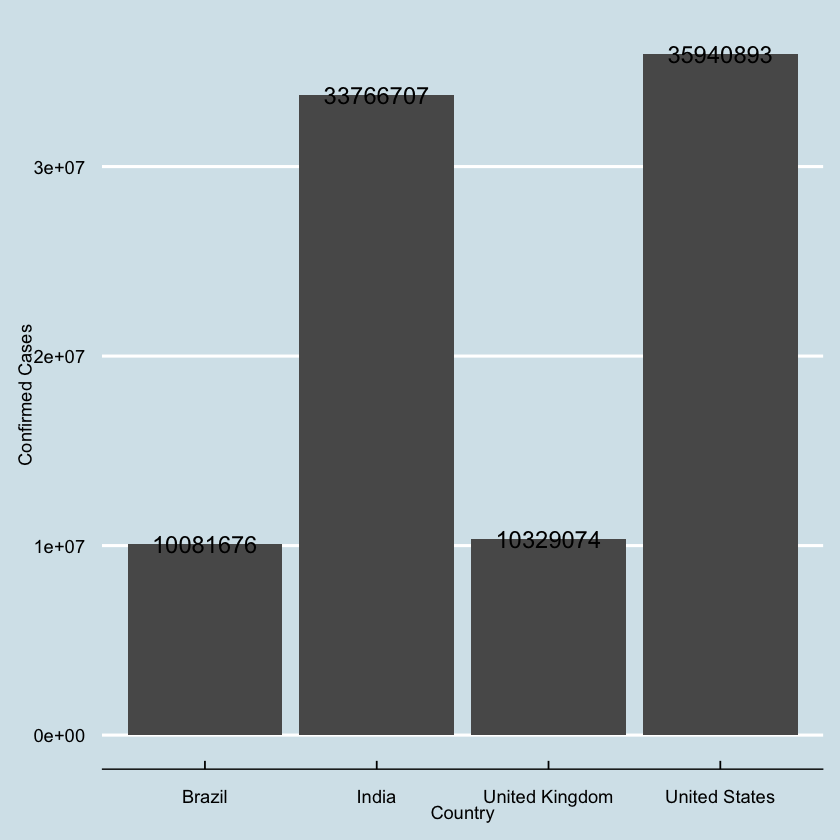

In [46]:
pl <- ggplot(top.three, aes(x = Country, y = Confirmed)) + geom_bar(stat = "identity") + 
geom_text(aes(label = Confirmed), size = 5) +
labs(x = "Country", y = "Confirmed Cases") +
theme_economist() 
print(pl)